<img src = "https://images2.imgbox.com/32/ac/wucGkuem_o.png" width="300">

In [18]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# carregando dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [20]:
len(imagens_treino)

60000

In [21]:
imagens_treino.shape

(60000, 28, 28)

In [22]:
imagens_teste.shape

(10000, 28, 28)

In [23]:
len(identificacoes_teste)

10000

In [24]:
identificacoes_treino.min()

0

In [25]:
identificacoes_treino.max()

9

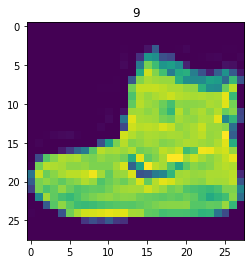

In [9]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0]);

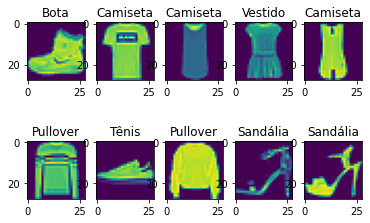

In [10]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

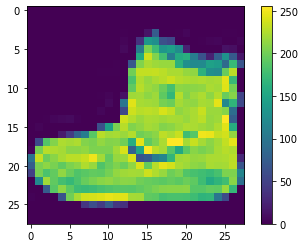

In [11]:
plt.imshow(imagens_treino[0])
plt.colorbar();

In [26]:
#normalização
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5264 - accuracy: 0.8145 - val_loss: 0.4172 - val_accuracy: 0.8529
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3974 - accuracy: 0.8553 - val_loss: 0.3636 - val_accuracy: 0.8703
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3627 - accuracy: 0.8660 - val_loss: 0.3524 - val_accuracy: 0.8758
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3392 - accuracy: 0.8746 - val_loss: 0.3537 - val_accuracy: 0.8718
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3230 - accuracy: 0.8811 - val_loss: 0.3282 - val_accuracy: 0.8847


In [13]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

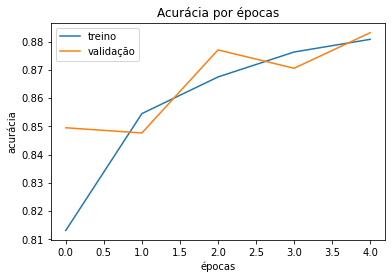

In [14]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação']);

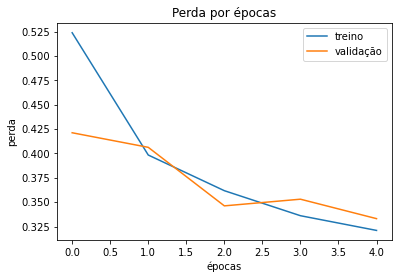

In [15]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação']);

In [16]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


In [17]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 48.6192 - accuracy: 0.8661
Perda do teste: 48.619239807128906
Acurácia do teste: 0.866100013256073
